In [1]:
import pandas as pd

# example to classify human vs animal

# dataset with one variable
can_speak = [True, True, True, True, True, True, True, False, False, False]
has_feathers = [False, False, False, False, False, True, True, False, False, False]
is_human = [True, True, True, True, True, False, False, False, False, False]

data = pd.DataFrame(
    {"can_speak": can_speak, "has_feathers": has_feathers, "is_human": is_human}
)
data

,can_speak,has_feathers,is_human
0,True,False,True
1,True,False,True
2,True,False,True
3,True,False,True
4,True,False,True
5,True,True,False
6,True,True,False
7,False,False,False
8,False,False,False
9,False,False,False


In [2]:
def self_made_decision_tree(observation):
    if observation.can_speak:
        if not observation.has_feathers:
            return "human"

    return "not human"


for i, row in data.iterrows():
    print(self_made_decision_tree(row))

human
human
human
human
human
not human
not human
not human
not human
not human


In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(shuffle=True, centers=2, n_samples=2000)

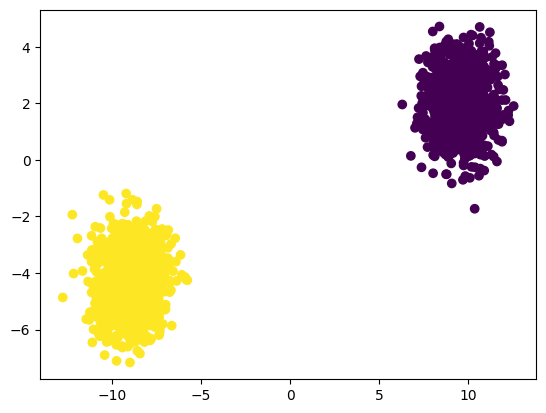

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [6]:
!pip install river
from river import linear_model

model = linear_model.LogisticRegression()

for x_i, y_i in zip(X_train, y_train):
    x_json = {"val1": x_i[0], "val2": x_i[1]}
    # print(x_json, y_i)
    model.learn_one(x_json, y_i)

In [7]:
import pandas as pd

preds = model.predict_many(pd.DataFrame(X_test, columns=["val1", "val2"]))

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

1.0

In [9]:
# make data
from sklearn.datasets import make_blobs

X, y = make_blobs(shuffle=True, centers=2, n_samples=2000)

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# build the model
from river import linear_model

model = linear_model.Perceptron()

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val1": x_i[0], "val2": x_i[1]}
    model.learn_one(x_json, y_i)

# predict on the test set
import pandas as pd

preds = model.predict_many(pd.DataFrame(X_test, columns=["val1", "val2"]))

# compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.896969696969697

In [10]:
# make data
from sklearn.datasets import make_classification

X, y = make_classification(shuffle=True, n_samples=2000)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.134234,1.104324,-0.660616,0.660525,-1.288635,2.130574,-0.958056,-2.107453,-1.199574,1.126037,-0.528442,0.509655,-1.144283,-2.925442,0.255870,-0.499193,-0.310060,-2.885826,-1.052838,-0.003035
1,0.336561,-0.739351,-0.191947,-0.229936,-0.219842,0.915635,0.336317,-0.956718,0.697342,0.655775,0.486436,0.571279,1.767864,-1.787821,0.163087,-0.919557,-0.407398,-0.481362,-0.497593,0.090089
2,-0.337682,2.037338,-0.786884,-0.633105,0.343746,-0.159971,0.305212,-2.219110,1.288601,-0.325596,-0.798545,1.180940,-1.423012,0.842949,-0.036543,0.246404,-0.355350,-1.827162,0.472904,-1.417405
3,0.128248,-1.189404,0.711120,0.641658,0.781217,0.707919,-0.578751,0.335799,0.192593,1.004894,0.038438,-0.543284,0.303363,-1.131172,-0.779971,0.217698,0.445995,2.038118,0.972642,0.449776
4,0.143656,0.271578,-1.311982,-0.735079,0.605448,-1.063970,-0.618728,-0.497800,-0.606378,0.178062,0.802976,0.439929,-0.246992,1.060055,0.158202,-1.892830,-1.035042,0.236497,1.964678,1.797279


In [11]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [12]:
from river import forest

model = forest.ARFClassifier()

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

In [13]:
# predict on the test set
import pandas as pd

preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

In [14]:
# compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8787878787878788

In [15]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       333
           1       0.90      0.84      0.87       327

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



In [16]:
# make data
from sklearn.datasets import make_classification

X, y = make_classification(shuffle=True, n_samples=2000)

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

from river import linear_model

model = linear_model.ALMAClassifier()

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

# predict on the test set
import pandas as pd

preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

# compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8303030303030303

In [17]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       314
           1       0.85      0.82      0.83       346

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



In [18]:
# make data
from sklearn.datasets import make_classification

X, y = make_classification(shuffle=True, n_samples=2000)

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

from river import linear_model

model = linear_model.PAClassifier()

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

# predict on the test set
import pandas as pd

preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

# compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9424242424242424